## Libraries

In [1]:
# Standard library imports
import os
import sys

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import buteo as beo
import import_ipynb

# Local imports
from utilities import custom_subplots, render_s2_as_rgb
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

## Data Exploration

In [ ]:
# Data path
data = os.path.join(os.getcwd(), '../data/CCAI_FLOODS_DATA')
print('Shapes are in the form (height, width, channels)')

# Label
example_label_path = os.path.join(data, 'label_3.tif')
example_label = beo.raster_to_array(example_label_path)

# DEM
example_dem_path = os.path.join(data, 'dem_3.tif')
example_dem = beo.raster_to_array(example_dem_path)

# S1
example_s1_path = os.path.join(data, 's1_3.tif')
example_s1 = beo.raster_to_array(example_s1_path)

# S2
example_s2_path = os.path.join(data, 's2_3.tif')
example_s2 = beo.raster_to_array(example_s2_path)

# RGB S2
example_s2_RGB_path = os.path.join(data, 's2_3.tif')
example_s2_RGB = beo.raster_to_array(example_s2_RGB_path, bands=[3, 2, 1]) # Select only RGB in that order

Shapes are in the form (height, width, channels)


In [ ]:
# Data shapes
print(f'P{example_label.shape}: Label Shape.')
print(f'P{example_dem.shape}: Digital Elevation Model Shape.')
print(f'P{example_s1.shape}: Sentinel-1 Shape.')
print(f'P{example_s2.shape}: Sentinel-2 Shape.')
print(f'P{example_s2_RGB.shape}: Sentinel-2 RGB Shape.')

P(1120, 1888, 1): Label Shape.
P(1120, 1888, 4): Digital Elevation Model Shape.
P(1120, 1888, 2): Sentinel-1 Shape.
P(1120, 1888, 9): Sentinel-2 Shape.
P(1120, 1888, 3): Sentinel-2 RGB Shape.


In [4]:
# To read the metadata of the tiles, use the raster_to_metadata function
example_label_meta = beo.raster_to_metadata(example_label_path)

for idx, (key, value) in enumerate(example_label_meta.items()):
    val = str(value) if len(str(value)) < 50 else str(value)[:50] + '...'
    print(f'{key}: {val}')

path: c:/Users/dango/OneDrive - UWE Bristol/projects/flo...
basename: label_3.tif
name: label_3
folder: c:/Users/dango/OneDrive - UWE Bristol/projects/flo...
ext: .tif
in_memory: False
driver: GTiff
projection_osr: PROJCS["WGS 84 / UTM zone 36N",
    GEOGCS["WGS 84...
projection_wkt: PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DAT...
geotransform: (690680.0, 10.0, 0.0, 3523400.0, 0.0, -10.0)
size: (1888, 1120)
shape: [1120, 1888, 1]
height: 1120
width: 1888
pixel_size: (10.0, 10.0)
pixel_width: 10.0
pixel_height: 10.0
origin: (690680.0, 3523400.0)
origin_x: 690680.0
origin_y: 3523400.0
centroid: (700120.0, 3517800.0)
centroid_latlng: (31.778210686443874, 35.113382815413104)
bbox: [690680.0, 709560.0, 3512200.0, 3523400.0]
bbox_gdal: [690680.0, 3512200.0, 709560.0, 3523400.0]
bbox_latlng: [31.726061354497087, 31.83034816464621, 35.0126554...
bounds_latlng: POLYGON ((35.0126554241882 31.7293629693438 0,35.2...
bounds_raster: POLYGON ((690680 3512200 0,709560 3512200 0,709560...
x_min:

## Visualise Labels

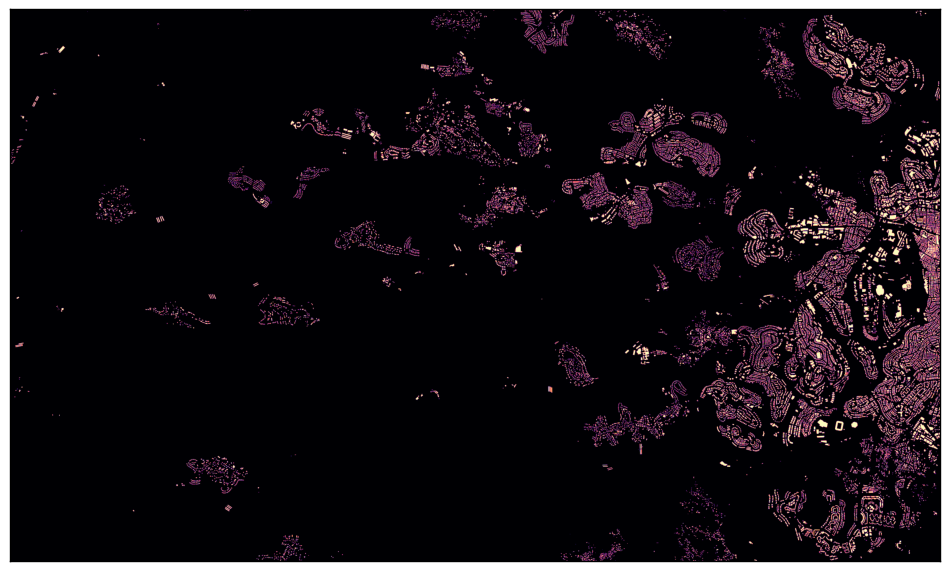

In [5]:
# Let's see what the building labels look like
# The value of the labels reflects the percentage of building coverage in the given pixel
# The brighter the pixel, the more of it is covered by structures
fig, ax = custom_subplots(size=(12, 8))
ax.imshow(example_label[:, :, 0], cmap='magma', vmin=0, vmax=100)
plt.show()
fig.clf()

## Visualise Hyperspectral Images

We are used to seeing 8-bit RGB images, which typically have values in the range 0-255. To get to this point from the original hyperspectral image (which comes as 16-bit image), we need to select the right bands and process them before we can display a nice RGB image. One way to do so is shown in ```render_s2_as_rgb``` function in utilities.ipynb!

**Note:** _For some optical satellites, RGB bands might not be available._

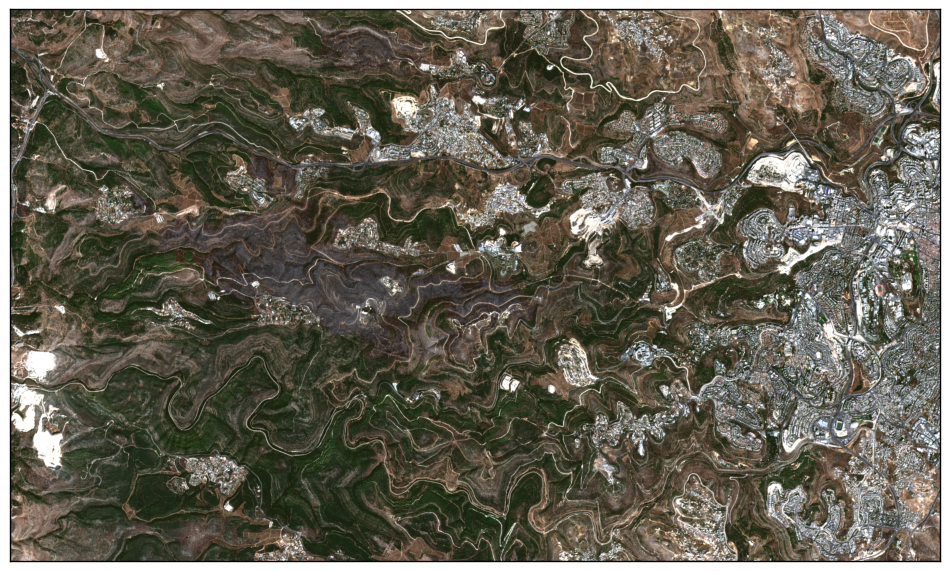

In [6]:
fig, ax = custom_subplots(size=(12, 8))
ax.imshow(render_s2_as_rgb(example_s2_RGB))
plt.show()
fig.clf()

## Visualise SAR data

The sentinel 1 data has two polarisations, Vertical Vertical (VV) and Vertical Horizontal (VH). A common way of visualising SAR imagery as RGB is to do the following: ```Blue: VV, Green: VH, Red: VV/VH``` but for now, lets just view one of the polarisations (VV).

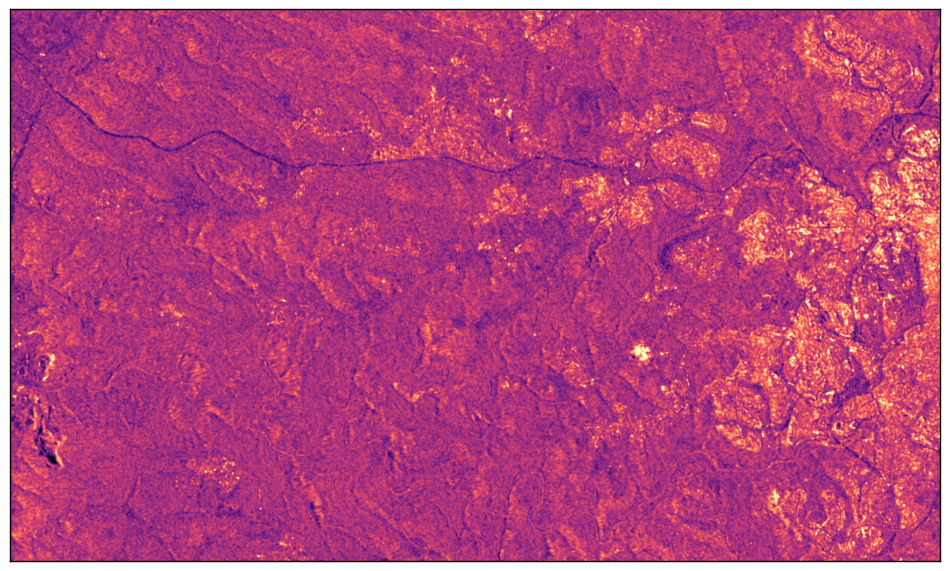

In [7]:
# Visualise the VV component of sentinel 1 data
fig, ax = custom_subplots(size=(12, 8))
ax.imshow(example_s1[:, :, 0], cmap='magma', vmin=-20, vmax=5)
plt.show()
fig.clf()

## Visualise DEM data

The DEM data contains 4 channels that contain information on the elevation profile.

The first 3 channels contain the orientation of the slope and the actual slope itself. Plotting these channels results in an aspect-slope image. The 4th channel contains the actual elevation. When plotted this gives us the elevation profile.

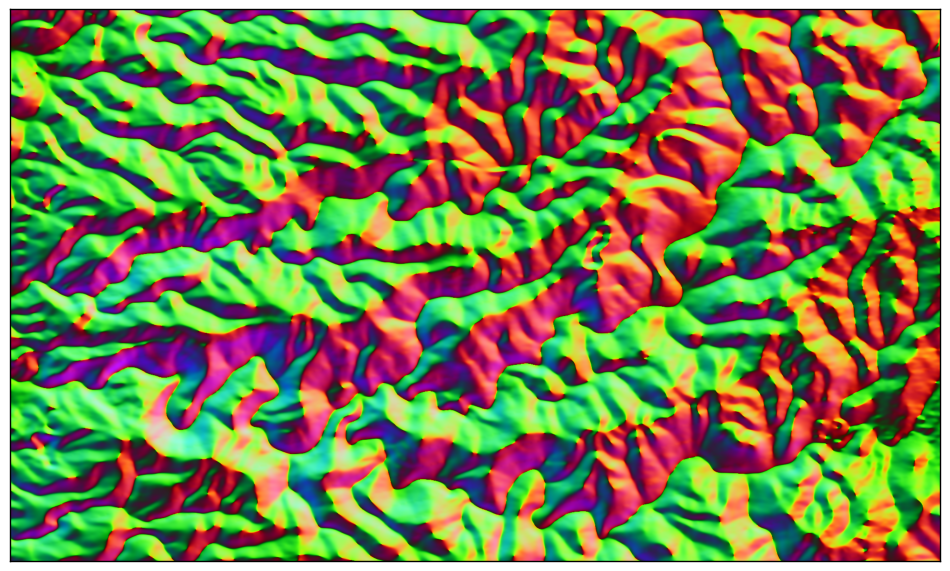

In [8]:
# Aspect-Slope Image

# The terrain data is already normalised to what is sometimes called the orientation.
# This is the aspect plotted as a 2D circle, and the slope.
fig, ax = custom_subplots(size=(12, 8))

# We normalise the DEM for visualisation to highlight the contrast in the image
for c in range(3):
  example_dem[:, :, c] = example_dem[:, :, c] / np.max(example_dem[:, :, c])

ax.imshow(example_dem[:, :, 0:3])
plt.show()
fig.clf()

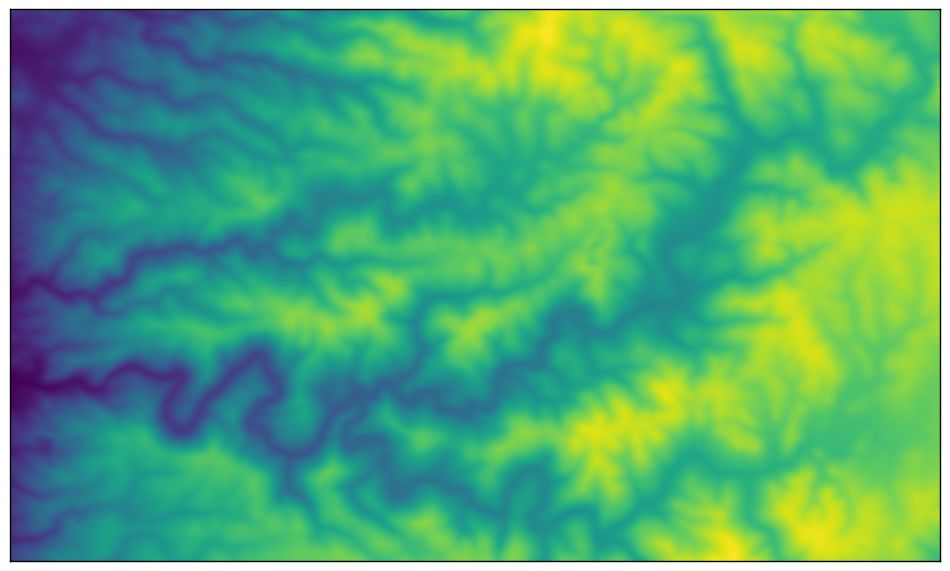

In [9]:
# Elevation Profile

# The elevation values themselves are in the fourth band, normalised to the hieght of Mt. Everest.
fig, ax = custom_subplots(size=(12, 8))
ax.imshow(example_dem[:, :, 3] / np.max(example_dem[:, :, 3]), cmap='viridis')
plt.show()
fig.clf()

## Predicting building and proxy population density

Our first task is to analyse the regions and find out which places have the highest density of vulnerable locations and where most of the poulation is concentrated.

For this task, we will train a Convolutional Neural Network (CNN) on the hyperspectral data from Sentinel-2. For the task of building density prediction, we have labels which we can use to train the model and evaluate the results.

## Prepare the data for our CNN

When working with computer vision tasks, it is often necessary to process large amounts of image data. This can be a challenging task, particularly when working with high-resolution images, which can contain millions of pixels. To make this task more manageable, images are typically divided into smaller sub-regions or patches.

These patches can be generated in a variety of ways, such as by using sliding windows or by randomly selecting regions of the image. We are going to use the buteo library for this. The patches are then typically grouped into batches, which are fed into the deep learning model during training. The major benefit of having patches is to reduce the amount of memory required to process the image data and to make it easier to work with.

It is important to be aware that during the process of creating patches some regions in the original image will be sampled multiple times, if overlaps are used. This means patches are not always independent of each other and might partially overlap. This is especially important to take into account when creating the test set, as it is essential that it is not contaminated with training data.

We can easily create the patches by using the ```array_to_patches``` function from the buteo library while specifying the size of the resulting arrays.

In [10]:
# Generate patches for a single image
# We can choose the size of the patches. Automatically, the patches can create offsets.
patches_label = beo.array_to_patches(example_label, 64)
patches_rgb = beo.array_to_patches(example_s2, 64)

# Patch, height, width, channel
print(patches_label.shape, patches_rgb.shape)

(540, 64, 64, 1) (540, 64, 64, 9)


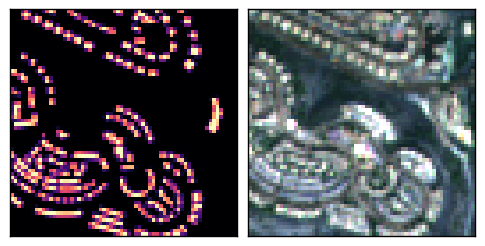

In [11]:
# We now have 1972 images with height 64 and width 64
fig, (ax1, ax2) = custom_subplots(nrows=1, ncols=2, size=(6, 6))

# Interpolation is set explicitly to nearest, smart smoothing at pixel level doesn't make sense
ax1.imshow(patches_label[400, :, :, 0], cmap='magma', interpolation='nearest')
ax2.imshow(render_s2_as_rgb(patches_rgb[400, :, :, :]), interpolation='nearest')
plt.show()